In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler

#model selection from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#pca
from sklearn.decomposition import PCA
#data_balance
from sklearn.utils import resample
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
import os
os.chdir(r'C:\Users\pravi\Desktop\PGP-DSE\CAPSTONE\lt-vehicle-loan-default-prediction\GitHub\Data')

In [4]:
df=pd.read_csv('./train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
df.shape

(233154, 41)

In [6]:
df.drop(['UniqueID','MobileNo_Avl_Flag'],axis=1,inplace=True)

### Attribute description

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                  

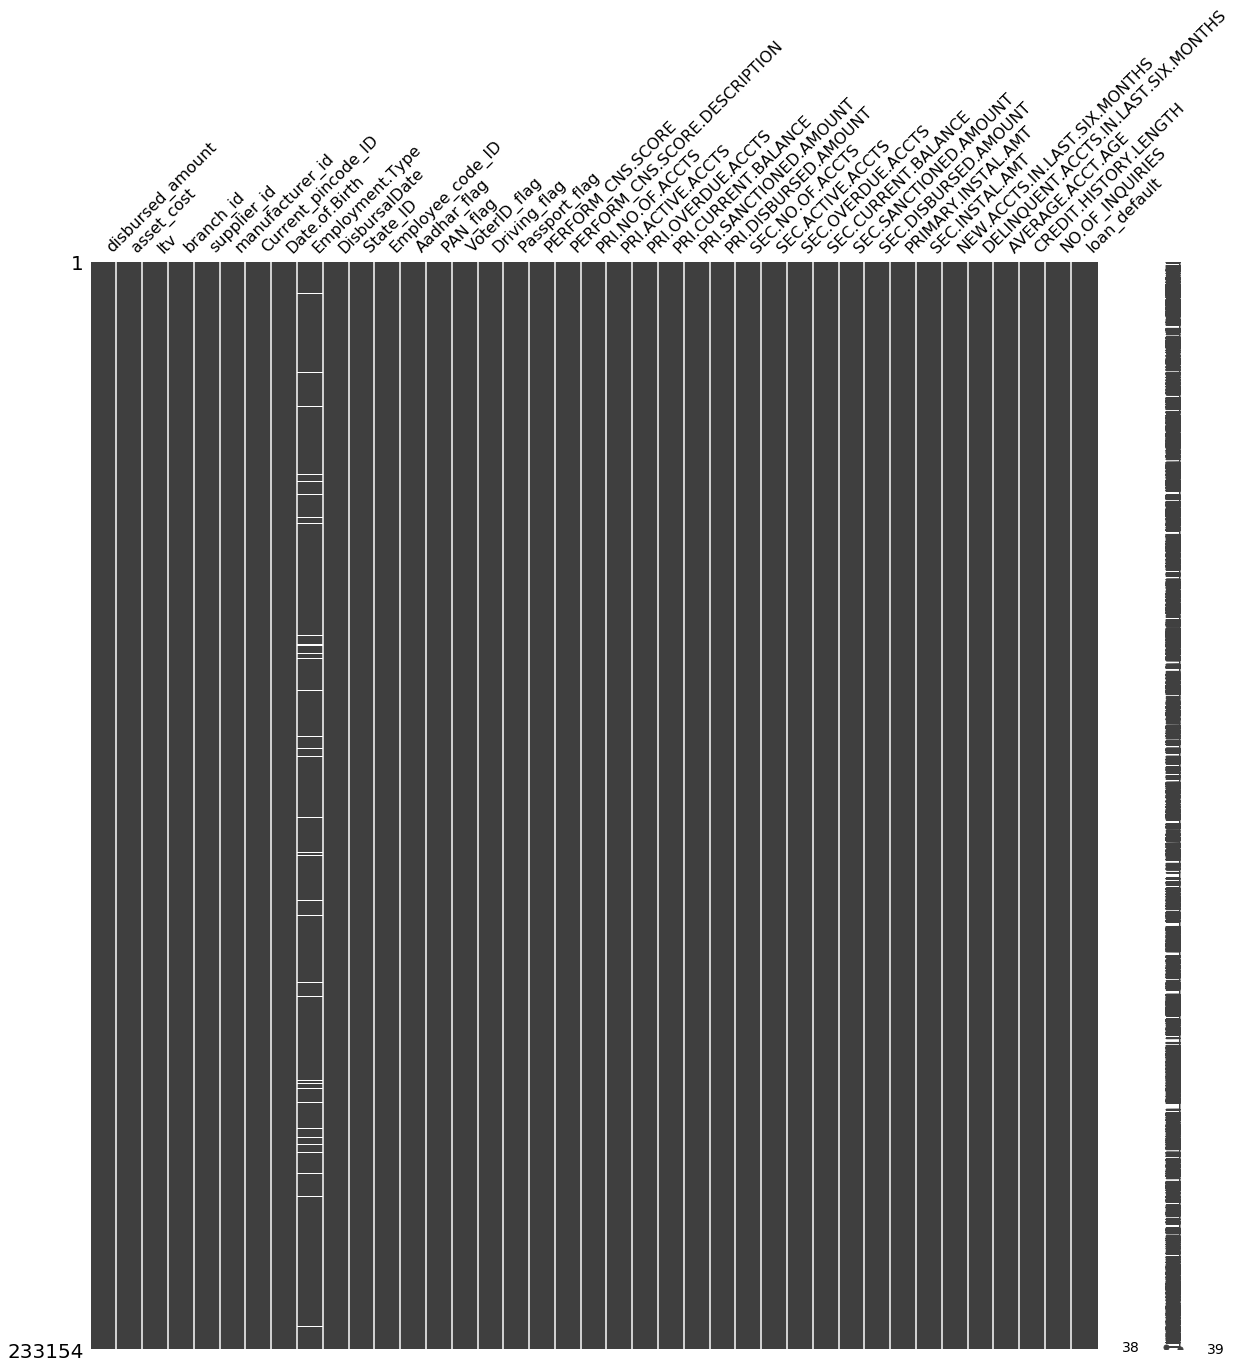

In [9]:
import missingno

missingno.matrix(df,figsize=(20,20))

## Data Wrangling

In [10]:
temp_col = ['PERFORM_CNS.SCORE.DESCRIPTION']
df[temp_col] = df[temp_col].replace('No Bureau History Available', 0)
df[temp_col] = df[temp_col].replace('Not Scored: Sufficient History Not Available',0)
df[temp_col] = df[temp_col].replace('Not Scored: Not Enough Info available on the customer',0)
df[temp_col] = df[temp_col].replace('Not Scored: No Activity seen on the customer (Inactive)',0) 
df[temp_col] = df[temp_col].replace('Not Scored: No Updates available in last 36 months',0) 
df[temp_col] = df[temp_col].replace('Not Scored: Only a Guarantor', 0)
df[temp_col] = df[temp_col].replace('Not Scored: More than 50 active Accounts found',0)
df[temp_col] = df[temp_col].replace('M-Very High Risk', 1)
df[temp_col] = df[temp_col].replace('L-Very High Risk', 1)
df[temp_col] = df[temp_col].replace('K-High Risk', 2)
df[temp_col] = df[temp_col].replace('J-High Risk', 2)
df[temp_col] = df[temp_col].replace('I-Medium Risk', 3)
df[temp_col] = df[temp_col].replace('H-Medium Risk', 3)
df[temp_col] = df[temp_col].replace('G-Low Risk', 4)
df[temp_col] = df[temp_col].replace('F-Low Risk', 4)
df[temp_col] = df[temp_col].replace('E-Low Risk', 4)
df[temp_col] = df[temp_col].replace('D-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('C-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('B-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('A-Very Low Risk', 5)

In [11]:
df['Employment.Type'].fillna('Others',inplace=True)
df['Employment.Type'].value_counts()
df['Employment.Type']=df['Employment.Type'].replace({'Self employed':0, 'Salaried':1 ,'Others':2})

In [12]:
df.rename(columns={'Employment.Type':'Employment_Type'},inplace=True)

In [13]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [14]:
df['Avg_Loan_tenure'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['Time_since_1st_loan'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)

In [15]:
df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [16]:
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)

In [17]:
df['Age_at_disbursal']=df['DisbursalDate']-df['Date.of.Birth']

In [18]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Avg_Loan_tenure,Time_since_1st_loan,Age_at_disbursal
0,50578,58400,89.55,67,22807,45,1441,1984,1,2018,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,67,22807,45,1502,1985,0,2018,6,1998,1,0,0,0,0,598,3,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,23,23,33
2,53278,61360,89.63,67,22807,45,1497,1985,0,2018,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,67,22807,45,1501,1993,0,2018,6,1998,1,0,0,0,0,305,1,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,8,15,25
4,52378,60300,88.39,67,22807,45,1495,1977,0,2018,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,41


In [19]:
# df.to_csv('basemodel.csv')

## Base Model

In [20]:
y=df.loan_default
X=df.drop(["loan_default",'Date.of.Birth','DisbursalDate'],axis=1)
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1]:
frame=pd.DataFrame({'max_depth':range(5,20),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
print(frame)

NameError: name 'pd' is not defined

In [21]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [22]:
# for Test set
model_score = lr.score(X_test,y_test)
print(model_score)

0.7827783893519379


In [23]:
# for train set
model_score = lr.score(X_train,y_train)
print(model_score)

0.7829688677568977


In [24]:
print("precision :",precision_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")

precision : 0.0 

f1 score: 0.0 



In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54756
           1       0.00      0.00      0.00     15191

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54753,     3],
       [15191,     0]], dtype=int64)

## With Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [30]:
# for Test set
model_score = lr.score(X_test,y_test)
print(model_score)

0.7825353481922027


In [31]:
model_score = lr.score(X_train,y_train)
print(model_score)

0.7828218152407679


In [32]:
print("precision :",precision_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")

precision : 0.4444444444444444 

f1 score: 0.010409212152755188 



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54656,   100],
       [15111,    80]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54756
           1       0.44      0.01      0.01     15191

    accuracy                           0.78     69947
   macro avg       0.61      0.50      0.44     69947
weighted avg       0.71      0.78      0.69     69947

